In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_excel('spotify.xlsx')  # Update with your file's name/path

# Convert the date_release column to datetime, handling errors
df['date_release'] = pd.to_datetime(df['date_release'], errors='coerce')
df = df[df['date_release'].dt.year >= 2017]

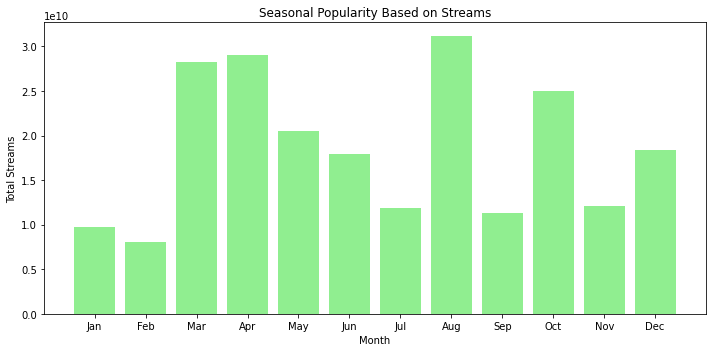

In [6]:
# Extract month from the release date
df["release_month"] = df["date_release"].dt.month

# Aggregate streams by month
seasonal_popularity = df.groupby("release_month").agg({"Streams": "sum"}).sort_values(by="release_month")

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(seasonal_popularity.index, seasonal_popularity["Streams"], color='lightgreen')
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Seasonal Popularity Based on Streams")
plt.xlabel("Month")
plt.ylabel("Total Streams")
plt.tight_layout()
plt.show()

<ipython-input-7-aa8312b1aedc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preferences_data.values, y=preferences_data.index, palette="muted")


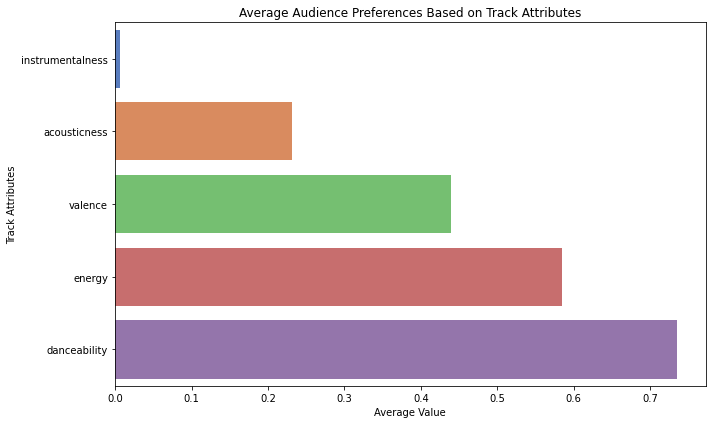

In [7]:
# Select relevant columns for audience preferences analysis
preferences_columns = ["acousticness", "danceability", "energy", "instrumentalness", "valence"]
preferences_data = df[preferences_columns].mean().sort_values()

# Plot audience preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=preferences_data.values, y=preferences_data.index, palette="muted")
plt.title("Average Audience Preferences Based on Track Attributes")
plt.xlabel("Average Value")
plt.ylabel("Track Attributes")
plt.tight_layout()
plt.show()

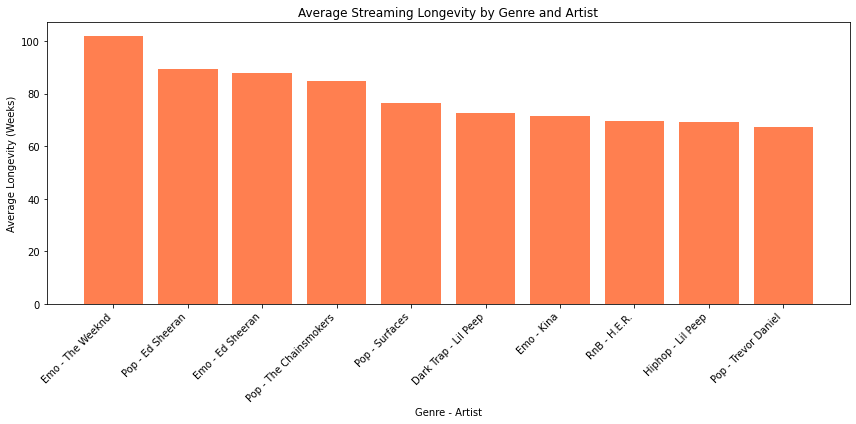

In [10]:
# Convert release date and end week to datetime format
df["start_week"] = pd.to_datetime(df["date_release"])
df["end_week"] = pd.to_datetime(df["end_week"])

# Calculate streaming longevity in weeks
df["longevity_weeks"] = (df["end_week"] - df["start_week"]).dt.days / 7

# Aggregate by artist and genre to analyze longevity
streaming_longevity = df.groupby(["genre", "artist_name"]).agg({
    "Streams": "sum",
    "longevity_weeks": "mean"
}).sort_values(by="longevity_weeks", ascending=False).head(10)

# Reset index for plotting
streaming_longevity.reset_index(inplace=True)

# Plot streaming longevity
plt.figure(figsize=(12, 6))
plt.bar(streaming_longevity["genre"] + " - " + streaming_longevity["artist_name"],
        streaming_longevity["longevity_weeks"], color="coral")
plt.xticks(rotation=45, ha="right")
plt.title("Average Streaming Longevity by Genre and Artist")
plt.xlabel("Genre - Artist")
plt.ylabel("Average Longevity (Weeks)")
plt.tight_layout()
plt.show()

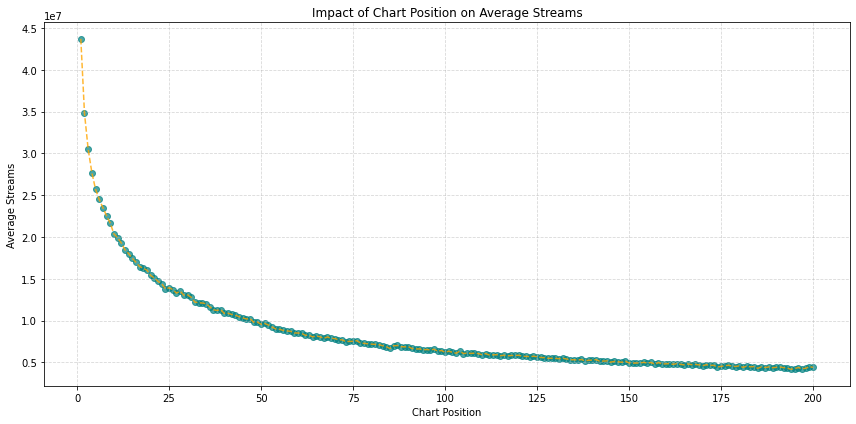

In [12]:
# Group by chart position and calculate average streams
placement_analysis = df.groupby("Position").agg({"Streams": "mean"}).sort_index()

# Plot track placement impact on streams
plt.figure(figsize=(12, 6))
plt.scatter(placement_analysis.index, placement_analysis["Streams"], color="teal", alpha=0.7)
plt.plot(placement_analysis.index, placement_analysis["Streams"], linestyle="--", color="orange", alpha=0.8)
plt.title("Impact of Chart Position on Average Streams")
plt.xlabel("Chart Position")
plt.ylabel("Average Streams")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

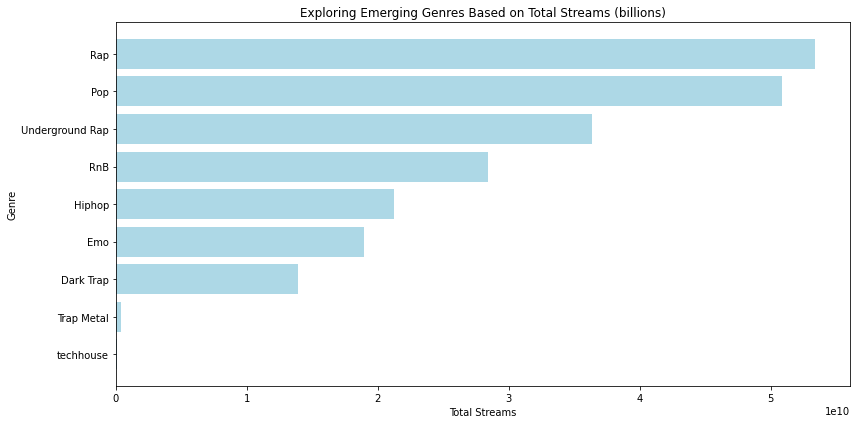

In [16]:
# Group by genre to calculate total streams
emerging_genres_analysis = df.groupby("genre").agg({"Streams": "sum"}).sort_values(by="Streams", ascending=True)

# Plot emerging genres based on total streams
plt.figure(figsize=(12, 6))
plt.barh(emerging_genres_analysis.index, emerging_genres_analysis["Streams"], color="lightblue")
plt.title("Exploring Emerging Genres Based on Total Streams (billions)")
plt.xlabel("Total Streams")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

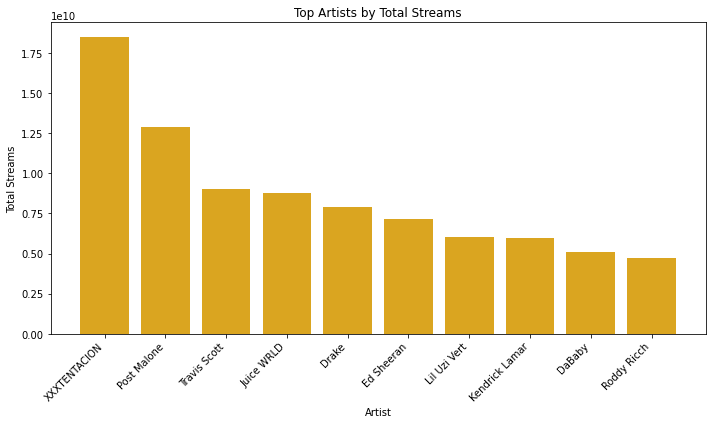

In [21]:
# Group by artist to calculate total streams
top_artists = df.groupby("artist_name").agg({"Streams": "sum"}).sort_values(by="Streams", ascending=False).head(10)

# Plot top artists by stream count
plt.figure(figsize=(10, 6))
plt.bar(top_artists.index, top_artists["Streams"], color="goldenrod")
plt.title("Top Artists by Total Streams")
plt.xlabel("Artist")
plt.ylabel("Total Streams")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

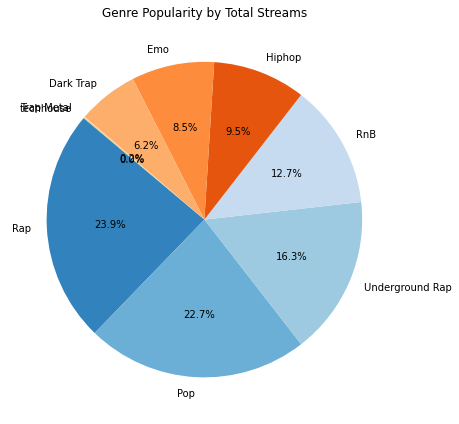

In [28]:
# Group by genre to calculate total streams
genre_popularity = df.groupby("genre").agg({"Streams": "sum"}).sort_values(by="Streams", ascending=False)

# Plot genre popularity
plt.figure(figsize=(12, 6))
plt.pie(genre_popularity["Streams"], labels=genre_popularity.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.tab20c.colors)
plt.title("Genre Popularity by Total Streams")
plt.tight_layout()
plt.show()